In [2]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data

path_2022 = "../data/movilidad_provincias_2022.csv"
path_2023 = "../data/movilidad_provincias_2023.csv"
path_2024 = "../data/movilidad_provincias_2024.csv"

original_data_2022 = pd.read_csv(path_2022, sep=",")
original_data_2023 = pd.read_csv(path_2023, sep=",")
original_data_2024 = pd.read_csv(path_2024, sep=",")

df_2022 = original_data_2022.copy()
df_2023 = original_data_2023.copy()
df_2024 = original_data_2024.copy()

### 2.1 Exploratory Data Analysis

### 2.1 Dataset Exploratory Data Analysis (EDA)

Top 20 dates with highest mobility:
           day  viajeros
220 2023-04-09   7293318
239 2023-04-28   6788326
344 2023-08-11   6750901
330 2023-07-28   6623688
217 2023-04-06   6584170
216 2023-04-05   6548348
316 2023-07-14   6514709
221 2023-04-10   6513253
700 2024-08-02   6489150
340 2023-08-07   6464723
409 2023-10-15   6445991
337 2023-08-04   6444981
707 2024-08-09   6432469
695 2024-07-28   6405283
332 2023-07-30   6403919
721 2024-08-23   6402258
57  2022-10-28   6387845
716 2024-08-18   6386600
686 2024-07-19   6347034
333 2023-07-31   6343800
Mobility details for top dates:
             day provincia_origen_name provincia_destino_name  viajeros
0     2022-10-28              Albacete               Alicante     21511
1     2022-10-28              Albacete                Almería       482
2     2022-10-28              Albacete               Asturias        33
3     2022-10-28              Albacete                Badajoz       186
4     2022-10-28              Albacete         

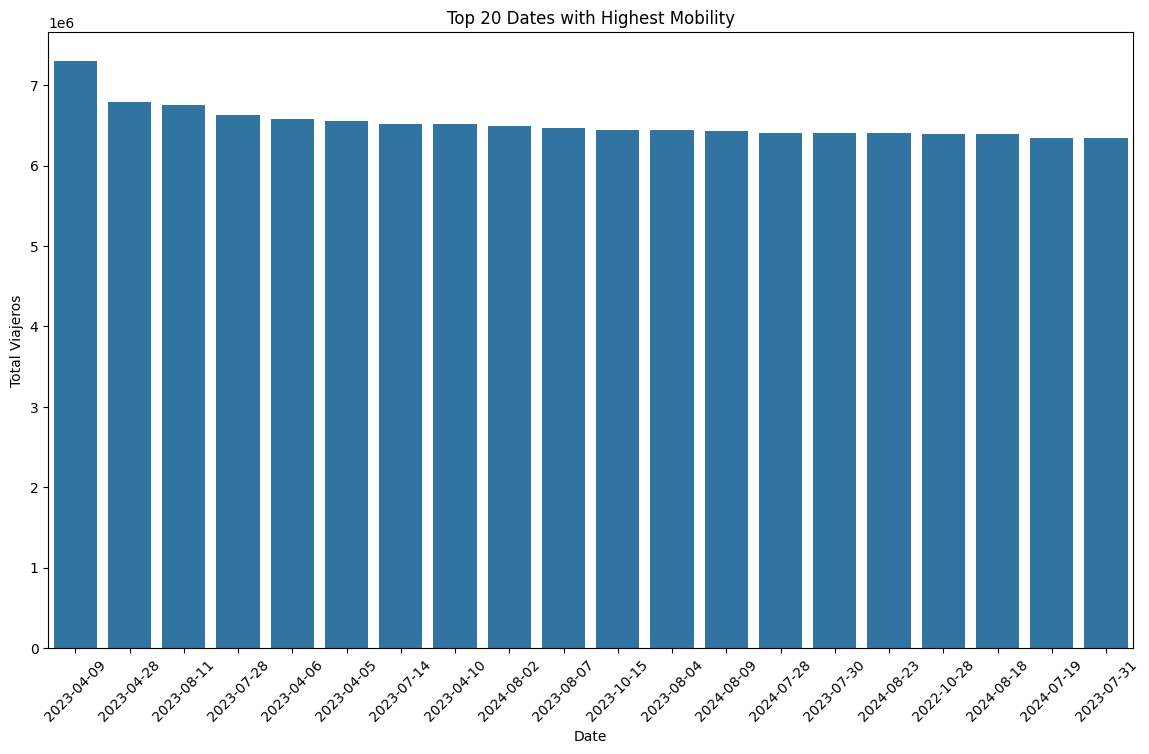

In [4]:
########Finding the top 20 dates with the highest mobility#############################################
df_2022['day'] = pd.to_datetime(df_2022['day'])
df_2023['day'] = pd.to_datetime(df_2023['day'])
df_2024['day'] = pd.to_datetime(df_2024['day'])
#combine data from all years
df_all = pd.concat([df_2022, df_2023, df_2024])
#Aggregate data to find total numb of travelers for each date
daily_mobility = df_all.groupby('day')['viajeros'].sum().reset_index()
#identify the dates with the highest mobility
top_mobility_dates = daily_mobility.sort_values(by='viajeros', ascending=False).head(20)
print("Top 20 dates with highest mobility:")
print(top_mobility_dates)
#Analyze the origin and destination locations for these dates
top_dates = top_mobility_dates['day'].tolist()
top_dates_data = df_all[df_all['day'].isin(top_dates)]
#Group by date, origin, and destination to find the total number of travelers
location_mobility = top_dates_data.groupby(['day', 'provincia_origen_name', 'provincia_destino_name'])['viajeros'].sum().reset_index()
#prints
print("Mobility details for top dates:")
print(location_mobility)
#Plots
plt.figure(figsize=(14, 8))
sns.barplot(x='day', y='viajeros', data=top_mobility_dates)
plt.title('Top 20 Dates with Highest Mobility')
plt.xlabel('Date')
plt.ylabel('Total Viajeros')
plt.xticks(rotation=45)
plt.show()

Top 3 destinations for top 20 dates with highest mobility:
            day provincia_destino_name  viajeros
29   2022-10-28                 Madrid    435422
46   2022-10-28                 Toledo    329955
7    2022-10-28              Barcelona    293052
81   2023-04-05                 Madrid    392341
59   2023-04-05              Barcelona    326776
98   2023-04-05                 Toledo    317840
133  2023-04-06                 Madrid    351090
111  2023-04-06              Barcelona    313319
148  2023-04-06              Tarragona    281336
185  2023-04-09                 Madrid    899781
163  2023-04-09              Barcelona    548078
202  2023-04-09                 Toledo    342879
237  2023-04-10                 Madrid    663939
215  2023-04-10              Barcelona    577507
255  2023-04-10      Valencia/Valéncia    298143
289  2023-04-28                 Madrid    429117
306  2023-04-28                 Toledo    362579
267  2023-04-28              Barcelona    327376
341  2023-

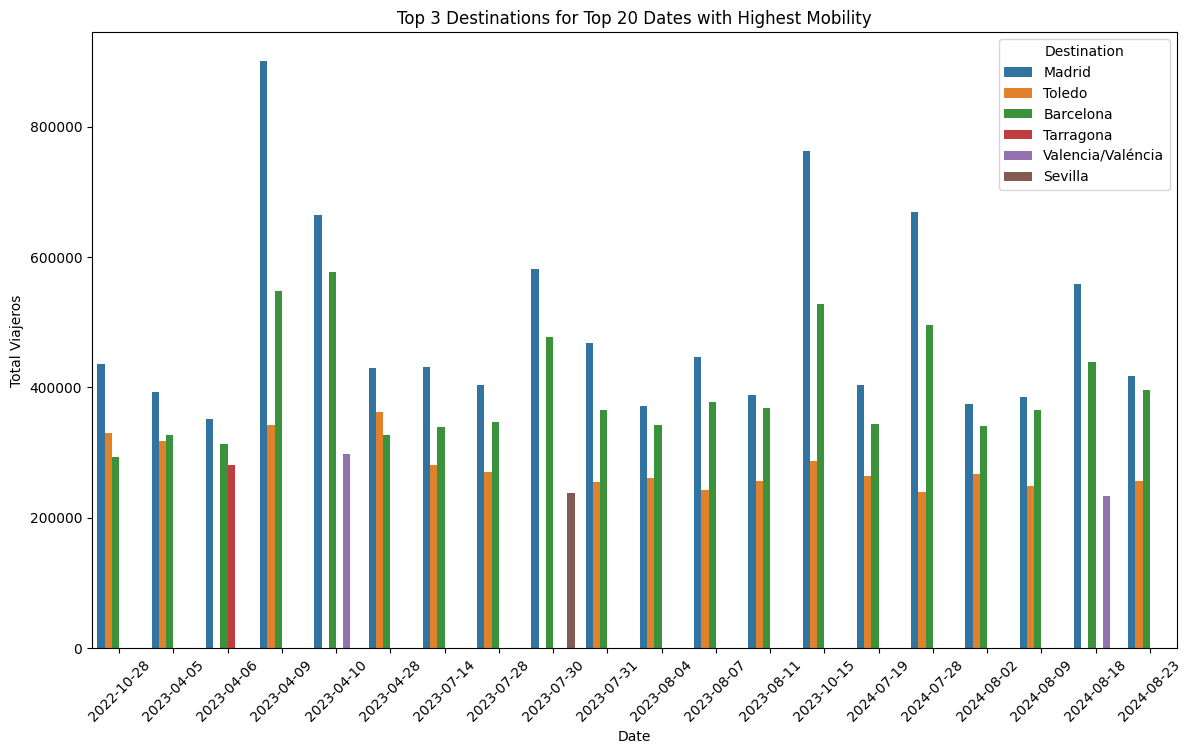

In [5]:
#group by date and destination to find the total num of travelers for each destination on the top dates
top_destinations = top_dates_data.groupby(['day', 'provincia_destino_name'])['viajeros'].sum().reset_index()

#for each top date, find top destination
top_destinations_per_date = top_destinations.sort_values(by=['day', 'viajeros'], ascending=[True, False]).groupby('day').head(3)

#prints
print("Top 3 destinations for top 20 dates with highest mobility:")
print(top_destinations_per_date)

plt.figure(figsize=(14, 8))
sns.barplot(x='day', y='viajeros', hue='provincia_destino_name', data=top_destinations_per_date)
plt.title('Top 3 Destinations for Top 20 Dates with Highest Mobility')
plt.xlabel('Date')
plt.ylabel('Total Viajeros')
plt.xticks(rotation=45)
plt.legend(title='Destination')
plt.show()

To focus on the mobility between the peninsula and the islands during specific periods (summer, Christmas, Easter, and regional holidays), and to make predictions about the number of people entering or leaving the islands, we can follow these steps:

Filter the data for the relevant periods and locations.
Analyze the mobility patterns during these periods.
Build a predictive model to forecast the number of travelers.

In [6]:
# Print unique province names
print("Unique province names (origin):")
print(df_all['provincia_origen_name'].unique())

print("Unique province names (destination):")
print(df_all['provincia_destino_name'].unique())

Unique province names (origin):
['Albacete' 'Alicante' 'Almería' 'Araba/Álava' 'Asturias' 'Badajoz'
 'Balears, Illes' 'Barcelona' 'Bizkaia' 'Burgos' 'Cantabria'
 'Castellón/Castelló' 'Ceuta' 'Ciudad Real' 'Coruña, A' 'Cuenca' 'Cáceres'
 'Cádiz' 'Córdoba' 'Gipuzkoa' 'Girona' 'Granada' 'Guadalajara' 'Huelva'
 'Huesca' 'Jaén' 'León' 'Lleida' 'Lugo' 'Madrid' 'Melilla' 'Murcia'
 'Málaga' 'Navarra' 'Ourense' 'Palencia' 'Palmas, Las' 'Pontevedra'
 'Rioja, La' 'Salamanca' 'Santa Cruz de Tenerife' 'Segovia' 'Sevilla'
 'Soria' 'Tarragona' 'Teruel' 'Toledo' 'Valencia/Valéncia' 'Valladolid'
 'Zamora' 'Zaragoza' 'Ávila']
Unique province names (destination):
['Alicante' 'Almería' 'Badajoz' 'Balears, Illes' 'Barcelona' 'Burgos'
 'Cantabria' 'Castellón/Castelló' 'Ciudad Real' 'Cuenca' 'Cáceres' 'Cádiz'
 'Córdoba' 'Gipuzkoa' 'Girona' 'Granada' 'Guadalajara' 'Huelva' 'Jaén'
 'León' 'Lugo' 'Madrid' 'Murcia' 'Málaga' 'Navarra' 'Palmas, Las'
 'Santa Cruz de Tenerife' 'Segovia' 'Sevilla' 'Tarragona' 'Teruel

In [49]:
# Define the periods of interest
summer_period = df_all[(df_all['day'].dt.month >= 7) & (df_all['day'].dt.month <= 8)]['day']
christmas_period = df_all[(df_all['day'].dt.month == 12) | (df_all['day'].dt.month == 1)]['day']
easter_period = [
    '2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04', '2023-04-05',
    '2023-04-06', '2023-04-07', '2023-04-08', '2023-04-09', '2023-04-10',
    '2024-03-23', '2024-03-24', '2024-03-25', '2024-03-26', '2024-03-27',
    '2024-03-28', '2024-03-29', '2024-03-30', '2024-03-31', '2024-04-01'
]
regional_holidays = ['2022-12-24', '2022-01-01', '2022-10-12', '2022-01-06', '2022-06-23', 
                     '2023-12-24', '2023-01-01', '2023-10-12', '2023-01-06', '2023-06-23', 
                     '2024-12-24', '2024-01-01', '2024-10-12', '2024-01-06', '2024-06-23'] 



# Convert regional holidays to datetime
regional_holidays = pd.to_datetime(regional_holidays)

# Filter data for the periods of interest
#df_filtered = df_all[summer_period | christmas_period | easter_period | df_all['day'].isin(regional_holidays)]
#Regional Holidays
df_filtered_regional = df_all[df_all['day'].isin(regional_holidays)]
#Easter Holidays
df_filtered_easter = df_all[df_all['day'].isin(easter_period)]
#Christmas Holidays
df_filtered_christmas = df_all[df_all['day'].isin(christmas_period)]
#summer holidays
df_filtered_summer = df_all[(df_all['day'].isin(summer_period))]
#All holidays
#df_filtered_allholidays = df_all[df_all['day'].isin(regional_holidays) | df_all['day'].isin(easter_period) | df_all['day'].isin(christmas_period)]

#df_filtered = df_all[df_all['day'].isin(regional_holidays)]
#top_dates_data = df_all[df_all['day'].isin(top_dates)]


df_filtered_alldates = df_all[df_all['day'].isin(top_dates)]



# Define the list of provinces for peninsula and islands based on the unique values printed earlier
peninsula_provinces = df_all['provincia_origen_name'].unique().tolist()  # All provinces in the peninsula

island_provinces = ['Balears, Illes', 'Palmas, Las', 'Santa Cruz de Tenerife']  # Example list of island provinces

# Filter for mobility between peninsula and islands
#All dates to islands
df_filtered_alldates = df_filtered_alldates[df_filtered_alldates['provincia_destino_name'].isin(island_provinces)]
print("Filtered Data all dates:")
print(df_filtered_alldates.head())

# Filter data to only include trips where the destination is an island province
df_filtered_regional = df_filtered_regional[df_filtered_regional['provincia_destino_name'].isin(island_provinces)]
print("Filtered Data Regional:")
print(df_filtered_regional.head())

df_filtered_easter = df_filtered_easter[df_filtered_easter['provincia_destino_name'].isin(island_provinces)]
print("Filtered Data Easter:")
print(df_filtered_easter.head())

df_filtered_christmas = df_filtered_christmas[df_filtered_christmas['provincia_destino_name'].isin(island_provinces)]
print("Filtered Data Christmas:")
print(df_filtered_christmas.head())

df_filtered_summer = df_filtered_summer[df_filtered_summer['provincia_destino_name'].isin(island_provinces)]
print("Filtered Data Summer:")
print(df_filtered_summer.head())


#All holidays
df_filtered = df_all[df_all['day'].isin(regional_holidays) | df_all['day'].isin(easter_period) | df_all['day'].isin(christmas_period ) | df_all['day'].isin(summer_period)]

C:\Users\oriol\AppData\Local\Temp\ipykernel_16976\1567373401.py:24: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_filtered_easter = df_all[df_all['day'].isin(easter_period)]
C:\Users\oriol\AppData\Local\Temp\ipykernel_16976\1567373401.py:70: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_filtered = df_all[df_all['day'].isin(regional_holidays) | df_all['day'].isin(easter_period) | df_all['day'].isin(christmas_period ) | df_all['day'].isin(summer_period)]


Filtered Data all dates:
        viajeros  viajes  provincia_origen provincia_origen_name  \
102278        37      97                 2              Albacete   
102296       269     283                 2              Albacete   
102297       240     277                 2              Albacete   
102313      2055    2086                 3              Alicante   
102336       161     202                 3              Alicante   

        provincia_destino  provincia_destino_name        day  
102278                  7          Balears, Illes 2022-10-28  
102296                 35             Palmas, Las 2022-10-28  
102297                 38  Santa Cruz de Tenerife 2022-10-28  
102313                  7          Balears, Illes 2022-10-28  
102336                 35             Palmas, Las 2022-10-28  
Filtered Data Regional:
       viajeros  viajes  provincia_origen provincia_origen_name  \
73727       152     154                 2              Albacete   
73728       111     111       

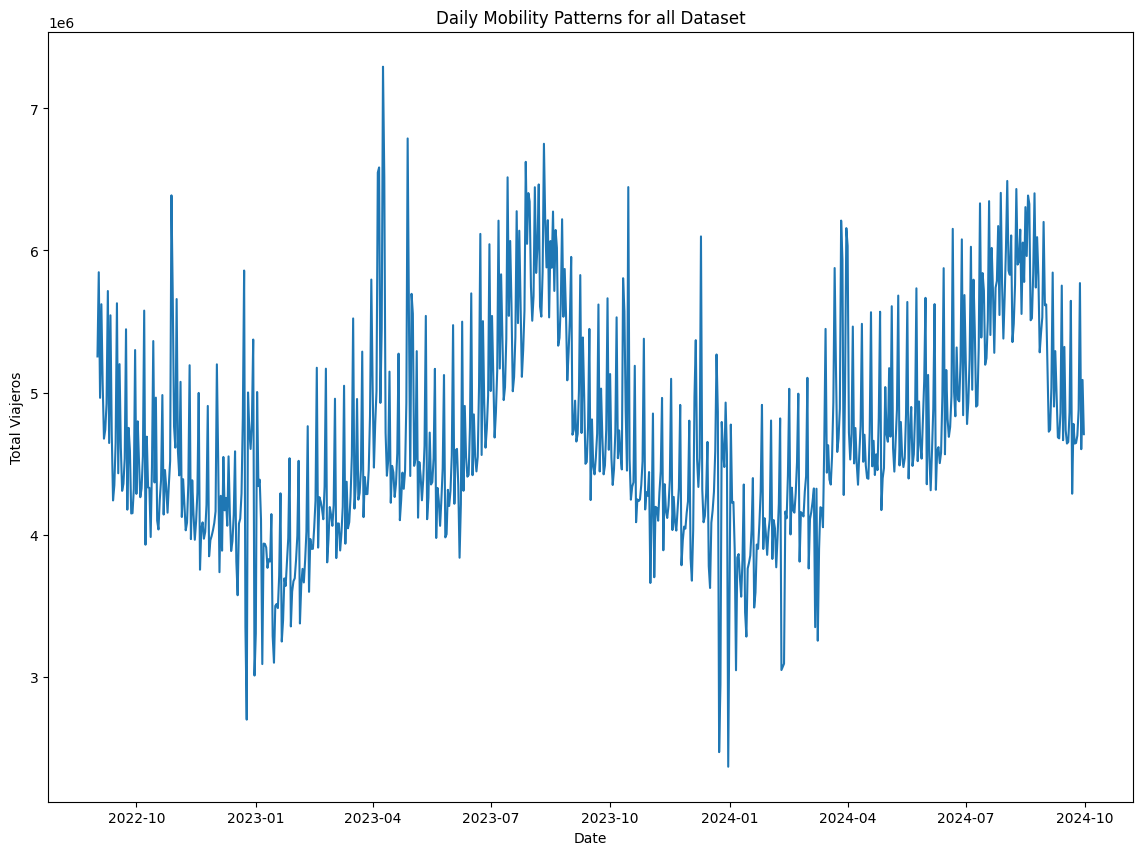

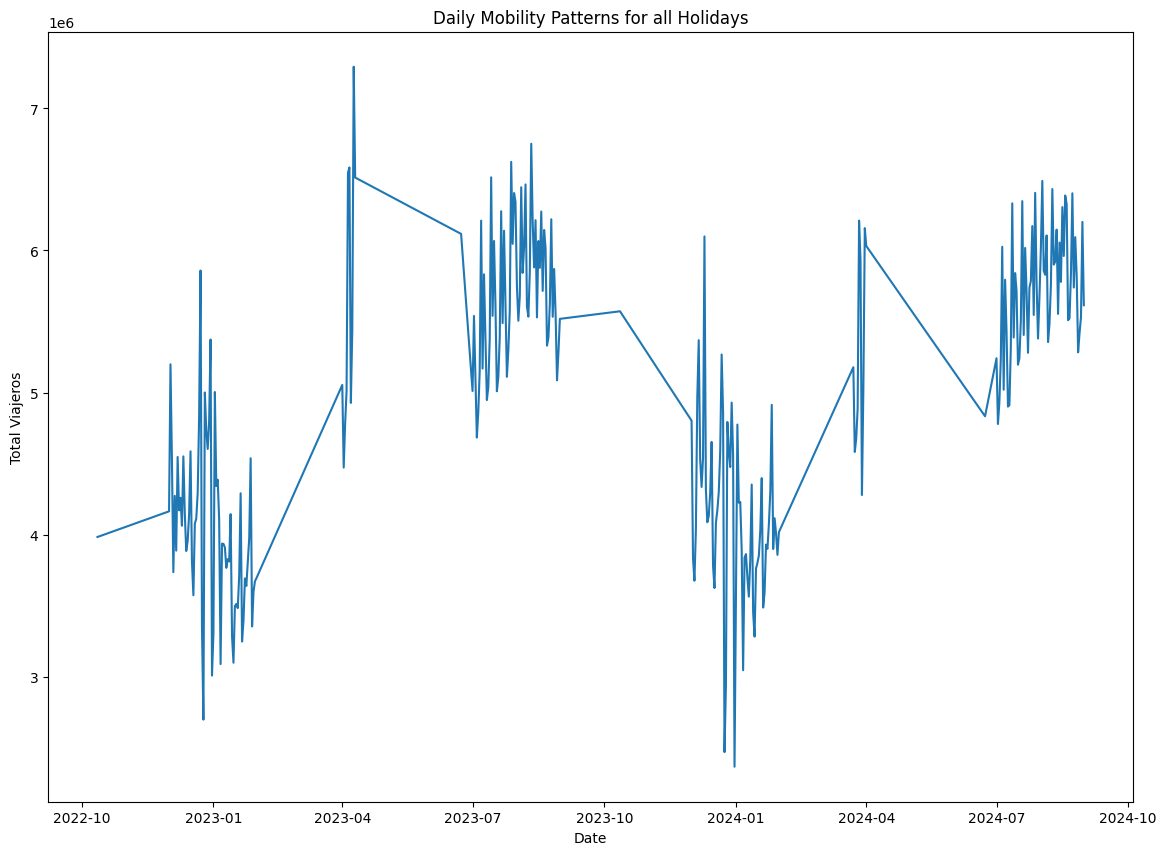

Top destinations for the top mobility dates:
             day provincia_destino_name  viajeros
29    2022-10-12                 Madrid    357500
7     2022-10-12              Barcelona    264453
46    2022-10-12                 Toledo    176031
81    2022-12-01                 Madrid    381282
59    2022-12-01              Barcelona    253665
...          ...                    ...       ...
14047 2024-08-30              Barcelona    378583
14086 2024-08-30                 Toledo    265257
14121 2024-08-31                 Madrid    491769
14099 2024-08-31              Barcelona    407816
14138 2024-08-31                 Toledo    236486

[816 rows x 3 columns]


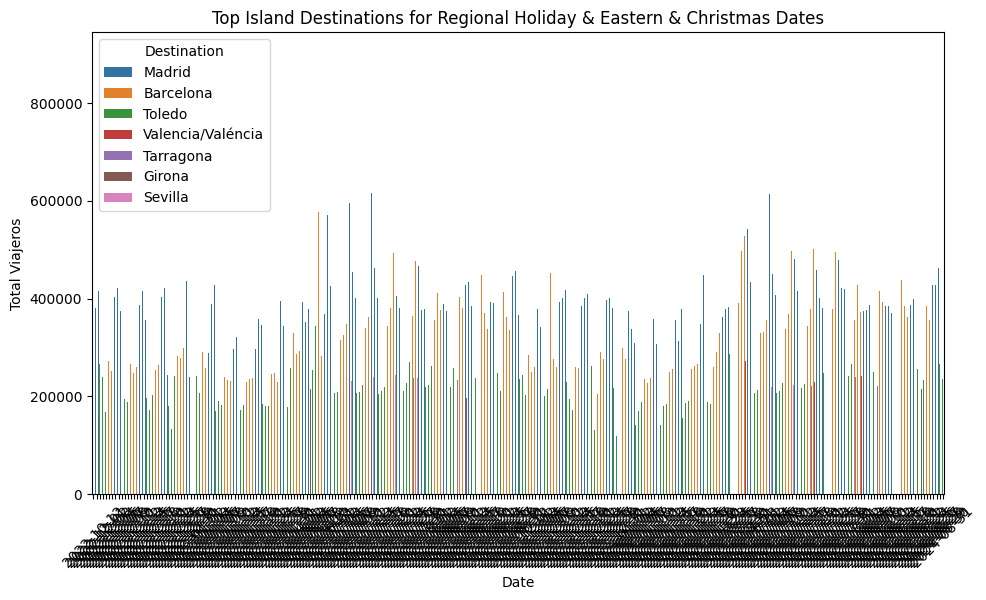

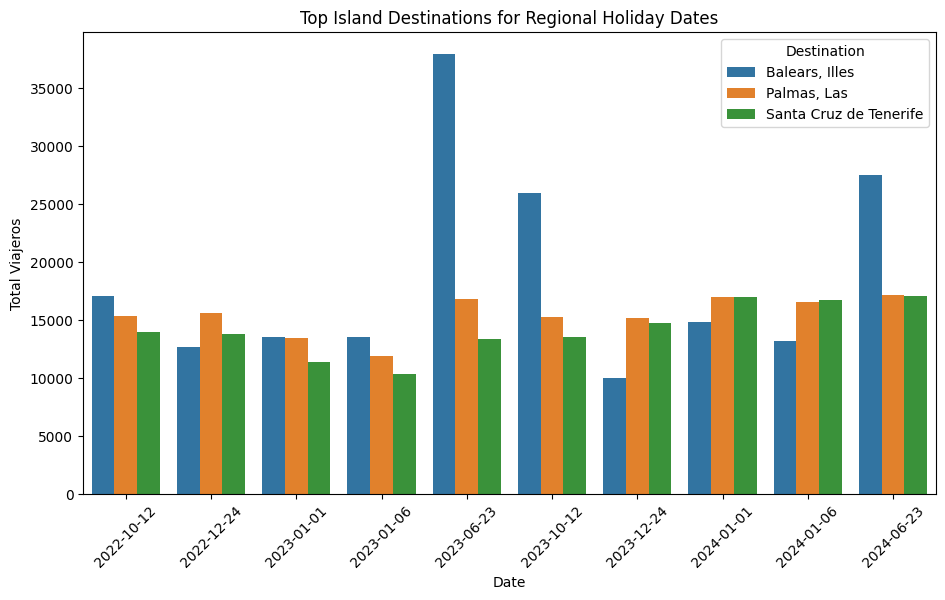

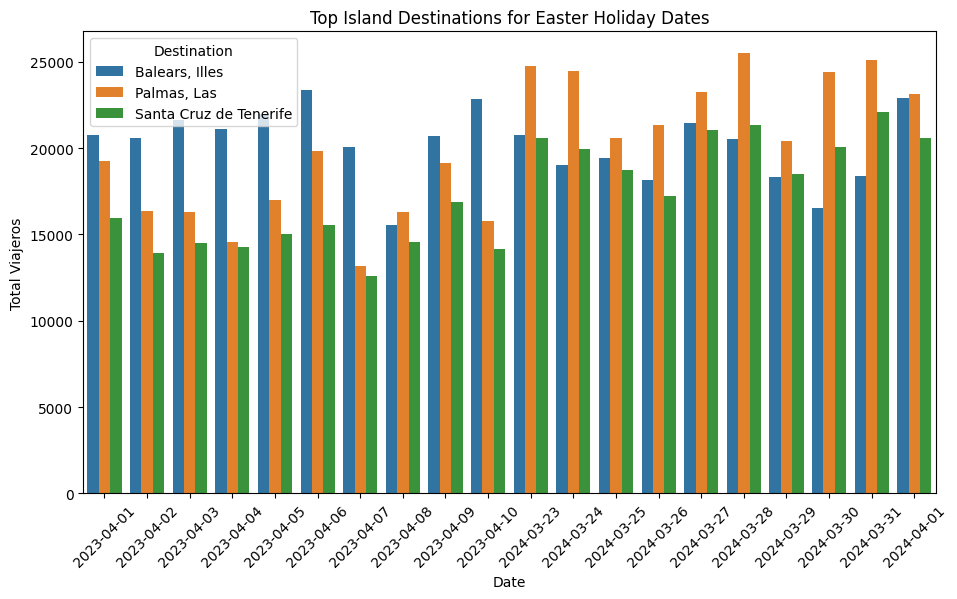

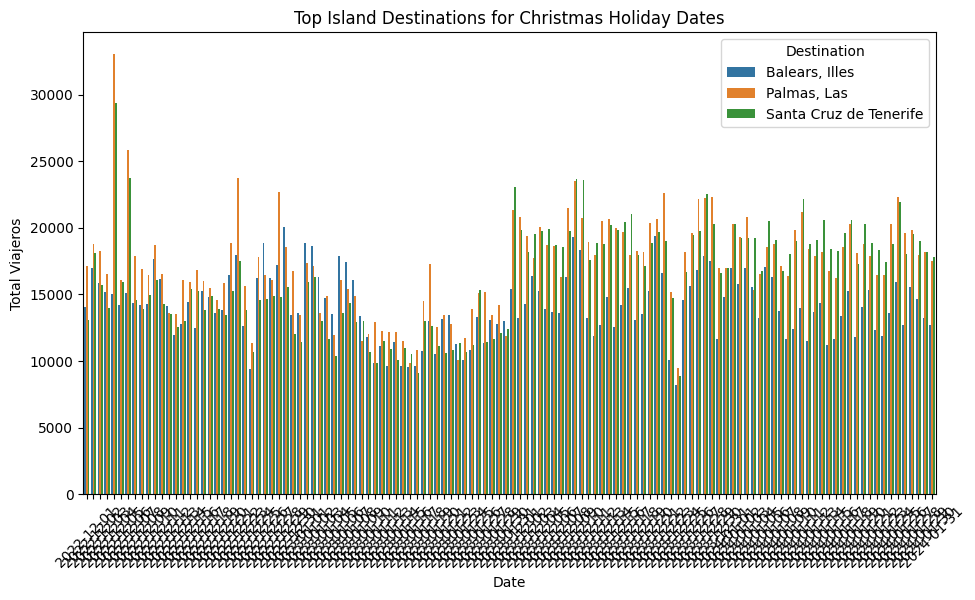

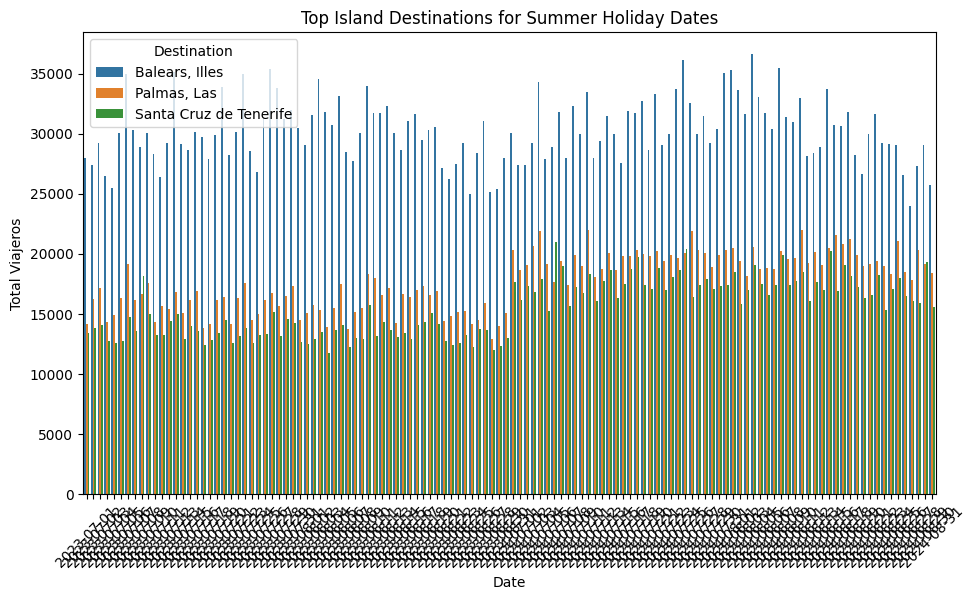

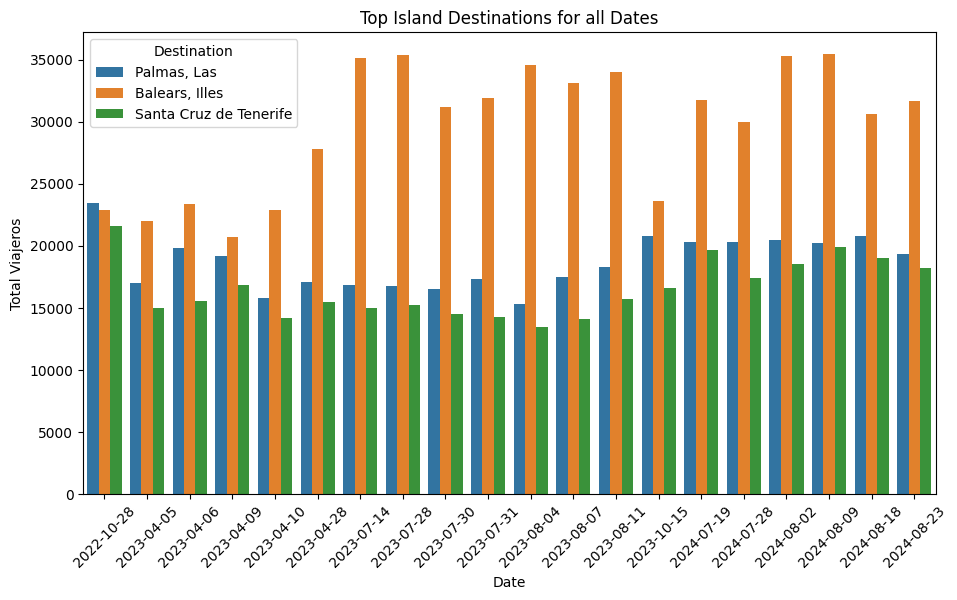

C:\Users\oriol\AppData\Local\Temp\ipykernel_16976\1789231432.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = df_filtered['day'].dt.day_name()


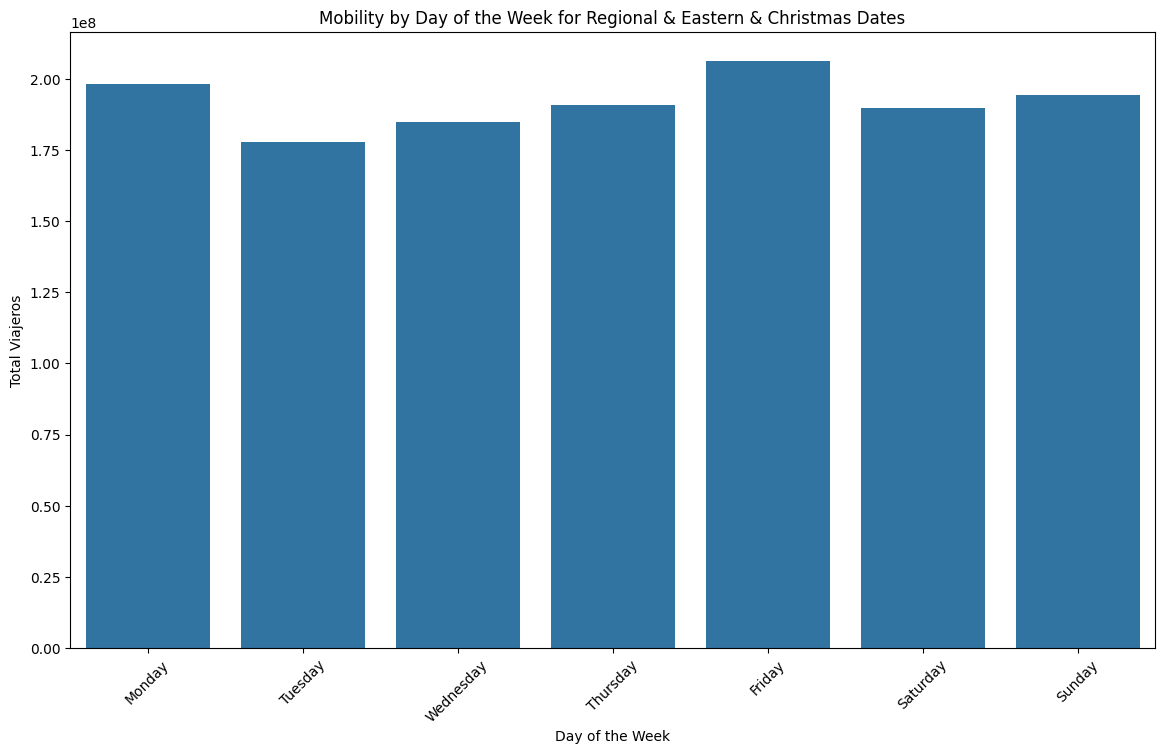

   provincia_origen_name   viajeros
29                Madrid  110565421
7              Barcelona   87177091
46                Toledo   58461591
47     Valencia/Valéncia   49649367
44             Tarragona   42964803
42               Sevilla   42540449
1               Alicante   42151050
20                Girona   41102146
31                Murcia   34595633
50              Zaragoza   33538234
32                Málaga   33244072
9                 Burgos   30811486
11    Castellón/Castelló   29765895
8                Bizkaia   28661452
22           Guadalajara   27836106
21               Granada   27159558
27                Lleida   27074788
48            Valladolid   25996620
15                Cuenca   25629991
33               Navarra   25549082
17                 Cádiz   25434258
14             Coruña, A   25231516
3            Araba/Álava   24968937
19              Gipuzkoa   22988550
0               Albacete   22934064
41               Segovia   22832340
24                Huesca   2

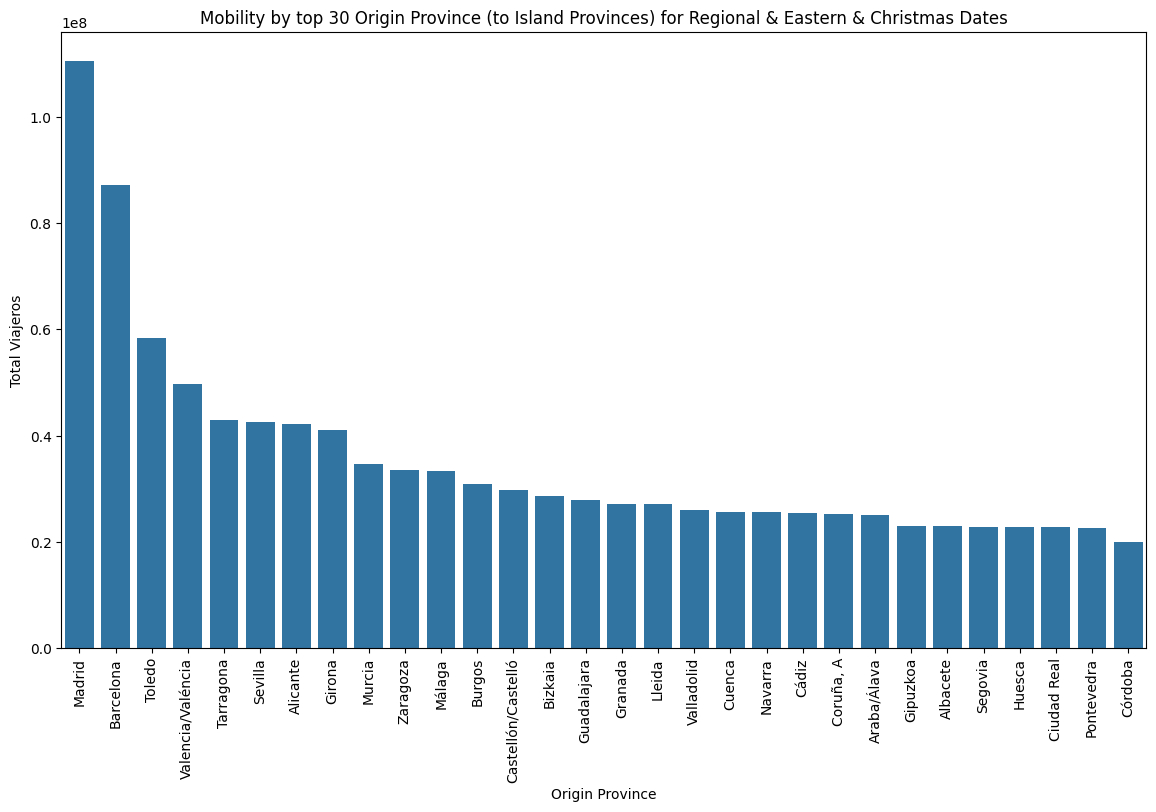

In [58]:
# Aggregate data to find total number of travelers for each date
daily_mobility_all = df_all.groupby('day')['viajeros'].sum().reset_index()
# Plot the mobility patterns
plt.figure(figsize=(14, 10))
sns.lineplot(x='day', y='viajeros', data=daily_mobility_all)
plt.title('Daily Mobility Patterns for all Dataset')
plt.xlabel('Date')
plt.ylabel('Total Viajeros')
plt.xticks(rotation=0)
plt.show()
daily_mobility_allholidays = df_filtered.groupby('day')['viajeros'].sum().reset_index()
# Plot the mobility patterns
plt.figure(figsize=(14, 10))
sns.lineplot(x='day', y='viajeros', data=daily_mobility_allholidays)
plt.title('Daily Mobility Patterns for all Holidays')
plt.xlabel('Date')
plt.ylabel('Total Viajeros')
plt.xticks(rotation=0)
plt.show()

top_mobility_dates_regional = daily_mobility.sort_values(by='viajeros', ascending=False).head(20)
top_mobility_dates_easter = daily_mobility.sort_values(by='viajeros', ascending=False).head(20)
top_mobility_dates_christmas = daily_mobility.sort_values(by='viajeros', ascending=False).head(20)
top_mobility_dates_summer = daily_mobility.sort_values(by='viajeros', ascending=False).head(20)

#top mobility for all holidays
top_mobility_dates_allholidays = daily_mobility.sort_values(by='viajeros', ascending=False).head(20)

# Group by date and destination to find the total number of travelers for each destination on the top dates
top_destinations = df_filtered.groupby(['day', 'provincia_destino_name'])['viajeros'].sum().reset_index()
top_destinations_alldates = df_filtered_alldates.groupby(['day', 'provincia_destino_name'])['viajeros'].sum().reset_index()
top_destinations_per_date_regional = df_filtered_regional.groupby(['day', 'provincia_destino_name'])['viajeros'].sum().reset_index()
top_destinations_per_date_easter = df_filtered_easter.groupby(['day', 'provincia_destino_name'])['viajeros'].sum().reset_index()
top_destinations_per_date_christmas = df_filtered_christmas.groupby(['day', 'provincia_destino_name'])['viajeros'].sum().reset_index()
top_destinations_per_date_summer = df_filtered_summer.groupby(['day', 'provincia_destino_name'])['viajeros'].sum().reset_index()
# For each top date, find the top 3 destinations
top_destinations_per_date = top_destinations.sort_values(by=['day', 'viajeros'], ascending=[True, False]).groupby('day').head(3)
top_destinations_per_date_alldates = top_destinations_alldates.sort_values(by=['day', 'viajeros'], ascending=[True, False]).groupby('day').head(3)


print("Top destinations for the top mobility dates:")
print(top_destinations_per_date)

# Plot top 20 destinations for top mobility dates
plt.figure(figsize=(11, 6))
sns.barplot(x='day', y='viajeros', hue='provincia_destino_name', data=top_destinations_per_date)
plt.title('Top Island Destinations for Regional Holiday & Eastern & Christmas Dates')
plt.xlabel('Date')
plt.ylabel('Total Viajeros')
plt.xticks(rotation=45)
plt.legend(title='Destination')
plt.show()

#plot for regional holidays
plt.figure(figsize=(11, 6))
sns.barplot(x='day', y='viajeros', hue='provincia_destino_name', data=top_destinations_per_date_regional)
plt.title('Top Island Destinations for Regional Holiday Dates')
plt.xlabel('Date')
plt.ylabel('Total Viajeros')
plt.xticks(rotation=45)
plt.legend(title='Destination')
plt.show()

#plot for easter holidays
plt.figure(figsize=(11, 6))
sns.barplot(x='day', y='viajeros', hue='provincia_destino_name', data=top_destinations_per_date_easter)
plt.title('Top Island Destinations for Easter Holiday Dates')
plt.xlabel('Date')
plt.ylabel('Total Viajeros')
plt.xticks(rotation=45)
plt.legend(title='Destination')
plt.show()

#plot for christmas holidays
plt.figure(figsize=(11, 6))
sns.barplot(x='day', y='viajeros', hue='provincia_destino_name', data=top_destinations_per_date_christmas)
plt.title('Top Island Destinations for Christmas Holiday Dates')
plt.xlabel('Date')
plt.ylabel('Total Viajeros')
plt.xticks(rotation=45)
plt.legend(title='Destination')
plt.show()

#plot for summer holidays
plt.figure(figsize=(11, 6))
sns.barplot(x='day', y='viajeros', hue='provincia_destino_name', data=top_destinations_per_date_summer)
plt.title('Top Island Destinations for Summer Holiday Dates')
plt.xlabel('Date')
plt.ylabel('Total Viajeros')
plt.xticks(rotation=45)
plt.legend(title='Destination')
plt.show()

# Plot top destinations for all mobility dates
plt.figure(figsize=(11, 6))
sns.barplot(x='day', y='viajeros', hue='provincia_destino_name', data=top_destinations_per_date_alldates)
plt.title('Top Island Destinations for all Dates')
plt.xlabel('Date')
plt.ylabel('Total Viajeros')
plt.xticks(rotation=45)
plt.legend(title='Destination')
plt.show()

# Analyze patterns in displacement days and origin provinces
# Group by day of the week to see if there are any patterns
df_filtered['day_of_week'] = df_filtered['day'].dt.day_name()
day_of_week_mobility = df_filtered.groupby('day_of_week')['viajeros'].sum().reset_index()

# Plot mobility by day of the week
plt.figure(figsize=(14, 8))
sns.barplot(x='day_of_week', y='viajeros', data=day_of_week_mobility, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Mobility by Day of the Week for Regional & Eastern & Christmas Dates')
plt.xlabel('Day of the Week')
plt.ylabel('Total Viajeros')
plt.xticks(rotation=45)
plt.show()


# Group by origin province to see if there are any patterns
origin_province_mobility = df_filtered.groupby('provincia_origen_name')['viajeros'].sum().reset_index()

#origin_province_mobility_toptravellers = origin_province_mobility.sort_values(by=['viajeros'], ascending=[True, False]).groupby('viajeros').head(3)
origin_province_mobility_toptravellers = origin_province_mobility.sort_values(by='viajeros', ascending=False).head(30)

print(origin_province_mobility_toptravellers)
# Plot mobility by origin province
plt.figure(figsize=(14, 8))
sns.barplot(x='provincia_origen_name', y='viajeros', data=origin_province_mobility_toptravellers)
plt.title('Mobility by top 30 Origin Province (to Island Provinces) for Regional & Eastern & Christmas Dates')
plt.xlabel('Origin Province')
plt.ylabel('Total Viajeros')
plt.xticks(rotation=90)
plt.show()